# Load the dataset

In [1]:
#conda install -c conda-forge keras tensorflow
import keras

In [2]:
from keras.datasets import mnist

In [3]:
#load mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# print the shapes of samples
print("Initial dimensions of the data:", (x_train.shape))
print("Number of samples in training data:", len(x_train))
print("Number of Labels in training data:", len(y_train))
print("Number of samples in test data:", len(x_test))
print("Number of labels in test data:", len(y_test))

Initial dimensions of the data: (60000, 28, 28)
Number of samples in training data: 60000
Number of Labels in training data: 60000
Number of samples in test data: 10000
Number of labels in test data: 10000


# Visualising images using OpenCV

In [5]:
import cv2
import numpy as np

In [6]:
# using openCV for visualising 6 random images from the dataset
#for i in range(0, 6):
   # random_num = np.random.randint(0, len(x_train))
    #img = x_train[random_num]
   # window_name = "Random Sample Image #" + str(i)
   # cv2.imshow(window_name, img)
   # cv2.waitKey(0)
#cv2.destroyAllWindows()

# Visualising images using Matplotlib

In [7]:
import matplotlib.pyplot as plt

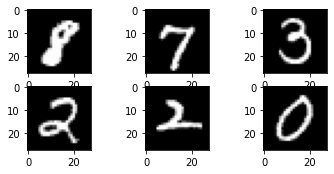

In [8]:
# Plot 6 random images
plt.subplot(331)  # subplot argument is nrows, ncols and index
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap("gray"))
plt.subplot(332)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap("gray"))
plt.subplot(333)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap("gray"))
plt.subplot(334)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap("gray"))
plt.subplot(335)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap("gray"))
plt.subplot(336)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap("gray"))
# Display all plots
plt.show()

# Reshaping the input according to keras

In [9]:
# keras accepts the input in form of number of samples, Rows, Columns, Depth
# shape of our samples is 60000, 28, 28 so we need to add depth dimension to it
# New shape should be 60000, 28, 28, 1 (if the data were in color it could be 60000, 28, 28, 3)

In [10]:
# Lets store number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]
print(img_rows)
print(img_cols)

28
28


In [11]:
# reshape
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
# Change the image type to fload32
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
print("Shape of x train:", x_train.shape)

Shape of x train: (60000, 28, 28, 1)


In [12]:
# Normalise the images from (0 to 255) to (0 to 1)
x_train = x_train/255.0
x_test = x_test/255.0

# One hot Encoding of Labels

In [13]:
# Labels are in the form y_train = [0, 6, 4, 7, 2, 4, 1, 0, 5, 8] which need one hot encoding

In [14]:
from keras.utils import np_utils

In [15]:
# one hot encode the label outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
# print number of classes available in labels
print("Number of classes:"+str(y_test.shape[1]))

Number of classes:10


# Create the Model

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [17]:
input_shape = (img_rows, img_cols, 1)
num_classes = y_test.shape[1]

In [18]:
opt = SGD(lr =0.01, momentum= 0.9)

In [19]:
# create model
model = Sequential()
model.add(Conv2D(32, kernel_size =(3, 3), activation = "relu", input_shape = input_shape))
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = "softmax"))

# compile the model
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])

# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

# Train the model

In [20]:
x_train.shape

(60000, 28, 28, 1)

In [21]:
y_train.shape

(60000, 10)

In [22]:
x_test.shape

(10000, 28, 28, 1)

In [23]:
y_test.shape

(10000, 10)

In [24]:
batch_size = 32
epochs = 10
# verbose shows how much information we want to see during fitting...generally verbose = 1 
history = model.fit(x_train, y_train, batch_size = 32, epochs= 1, verbose = 1, validation_data = (x_test, y_test))
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose =0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

1875/1875 [==============================] - 94s 50ms/step - loss: 0.2664 - accuracy: 0.9177 - val_loss: 0.0664 - val_accuracy: 0.9797
Test loss: 0.0663556382060051
Test accuracy: 0.9797000288963318


In [25]:
import matplotlib.pyplot as plt

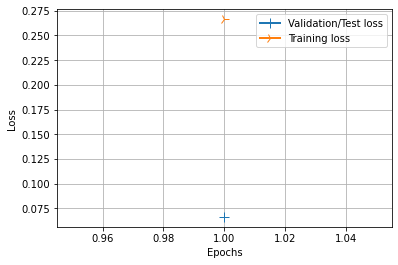

In [26]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs =range(1, len(loss_values)+1)
line1 = plt.plot(epochs, val_loss_values, label = "Validation/Test loss")
line2 = plt.plot(epochs, loss_values, label = "Training loss")
plt.setp(line1, linewidth =2.0, marker = "+", markersize = 10.0)
plt.setp(line2, linewidth =2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

# saving the model

In [27]:
model.save("MNIST_hand_written_digit_identification.h5")
print("Model saved")

Model saved


# Loading saved model

In [28]:
from keras.models import load_model
classifier = load_model("MNIST_hand_written_digit_identification.h5")

# Input some test data into the classifier

In [29]:
def draw_test(name, pred, input_im):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT, value= BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70), cv2.FONT_HERSHEY_SIMPLEX, 4, (0,255,0), 2)
    #cv2.imshow(name, expanded_image)

for i in range(0, 10):
    rand = np.random.randint(0, len(x_test))
    input_im = x_test[rand]
    
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)
    
    # Get predictions
    res = str(classifier.predict_classes(input_im, 1, verbose=0)[0])
    
    draw_test("Predictions", res, imageL)
    #cv2.waitKey(0)
#cv2.destroyALLWindows()


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [34]:
conda install -c conda-forge pydot  graphviz

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\MKR\anaconda3

  added / updated specs:
    - graphviz
    - pydot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    pydot-1.4.2                |   py38haa244fe_0          43 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        29.3 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  pydot              conda-forge/win-64::pydot-1.4.2-py38haa244fe_0




graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz

# Generating the diagram from model architecture

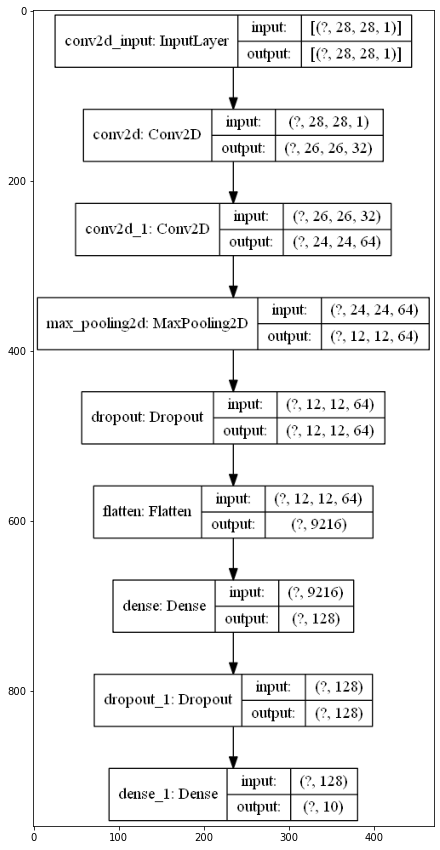

In [36]:
from keras.utils.vis_utils import plot_model
import matplotlib.image as mpimg
# Save the model to the path
#model_diagrams_path = " "
# Generate the plot
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# Show plot here
img =mpimg.imread("model_plot.png")
plt.figure(figsize = (30, 15))
imgplot = plt.imshow(img)